In [10]:
import catboost
print(catboost.__version__)


1.2.2


# STEP1: IMPORT LIBRARIES

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier, Pool
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF


from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score


from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from pandas.plotting import scatter_matrix

# STEP2: LOAD THE DATASET

In [12]:
df= pd.read_csv("diabetes.csv")

# STEP3: EXPLORATORY DATA ANALYSIS

### Understanding Variables

##### 3.1: Head, Tail, Info and Sample of dataset

In [15]:
#df.head()

In [216]:
#df.tail()

In [217]:
#df.info()

In [218]:
#df.sample()

##### 3.2: Shape of the dataset

In [219]:
df.shape

(768, 9)

##### 3.3: Types of all columns

In [220]:
#df.dtypes

##### 3.4: Info of the dataset

In [221]:
#df.info()

##### 3.5: Summary of the dataset

In [222]:
df.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

##### 3.6: Correlation of variables before data cleaning 

In [223]:
df.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221071                  0.137337   
BloodPressure             0.088933  0.281805                  0.041265   
SkinThickness             0.436783  0.392573                  0.183928   
Insulin                   1.000000  0.197859                  0.185071   
BMI                       0.197859  1.000000                  0.140647   
DiabetesPedigreeFunction  0.185071  0.140647                  1.000000   
Age                      -0.042163  0.036242                  0.033561   
Outcome                   0.130548  0.292695                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.263514  0.466581  
BloodPressure             0.239528  0.065068  
SkinThickness            -0.113970  0.074752  
Insulin                  -0.042163  0.130548  
BMI                       0.036242  0.292695  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

##### 3.7: Check and drop the duplicates

In [224]:
df.shape

(768, 9)

In [225]:
df= df.drop_duplicates()
df.shape

(768, 9)

##### 3.8: Check null values

In [226]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

##### 3.9: Check zero values and replace them with mean values

In [227]:
#checking
print('No. of zero values in Glucose ', df[df['Glucose']==0].shape[0])
print('No. of zero values in BloodPressure ', df[df['BloodPressure']==0].shape[0])
print('No. of zero values in SkinThickness ', df[df['SkinThickness']==0].shape[0])
print('No. of zero values in Insulin ', df[df['Insulin']==0].shape[0])
print('No. of zero values in BMI ', df[df['BMI']==0].shape[0])

No. of zero values in Glucose  5
No. of zero values in BloodPressure  35
No. of zero values in SkinThickness  227
No. of zero values in Insulin  374
No. of zero values in BMI  11


In [228]:
#replace
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean())
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())

# STEP4: DATA CLEANING ANAD VISUALIZATION

### 4.1: Data visualization before cleaning

##### 4.1.1: Pie Chart and Count Plot

Negative(0): 500
Positive(1): 268


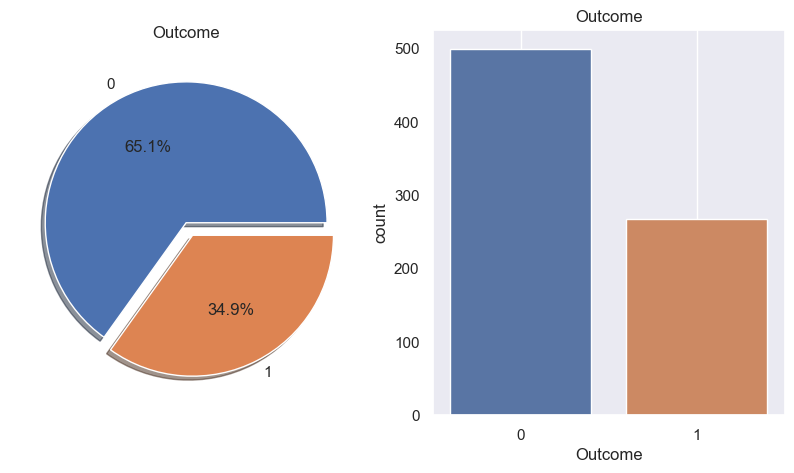

In [231]:
# Create subplots
f, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot pie chart on the first subplot
df['Outcome'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Outcome')
ax[0].set_ylabel('')

# Plot countplot on the second subplot

sns.countplot(x='Outcome', data=df, ax=ax[1])
ax[1].set_title('Outcome')

# Count the number of Negative (0) and Positive (1) outcomes
N, P = df['Outcome'].value_counts()
print('Negative(0):', N)
print('Positive(1):', P)

plt.grid()
plt.show()

##### 4.1.2: Histogram

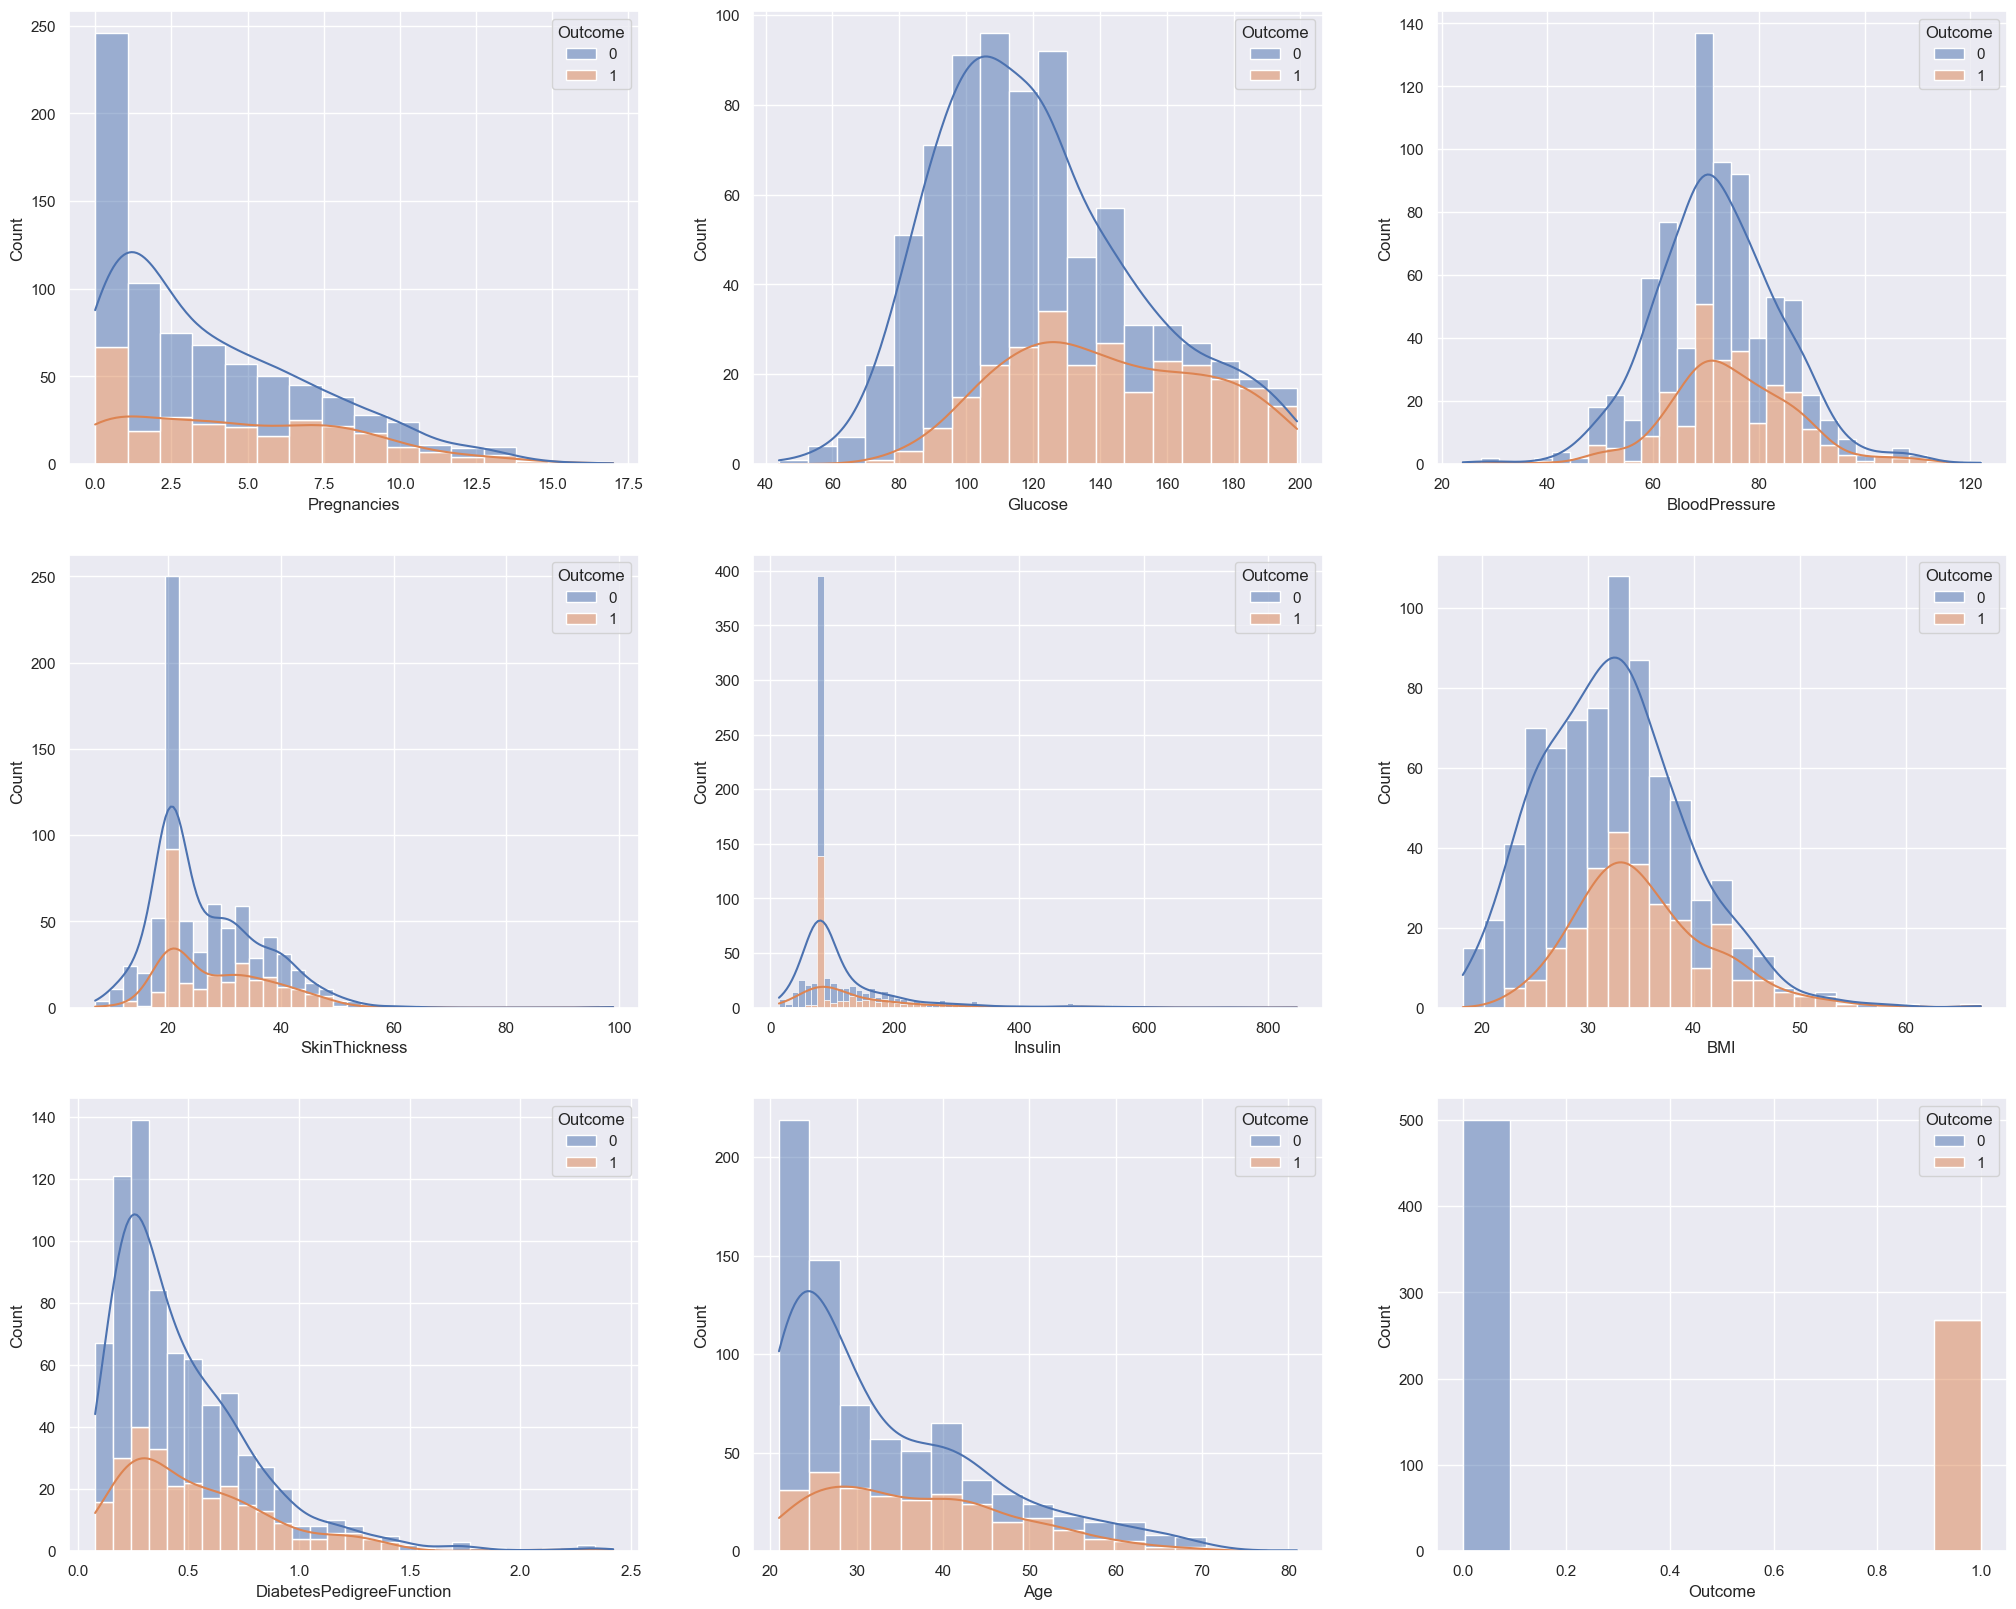

In [232]:
plt.figure(figsize=(25,20))
plotnumber=1
sns.set()
for column in df:
    if plotnumber<=9:        
        ax=plt.subplot(3,3,plotnumber)       
        sns.histplot(df, x=df[column],kde=True,hue='Outcome', multiple='stack')
    plotnumber+=1
plt.show()

##### 4.1.3: Scatter Plot

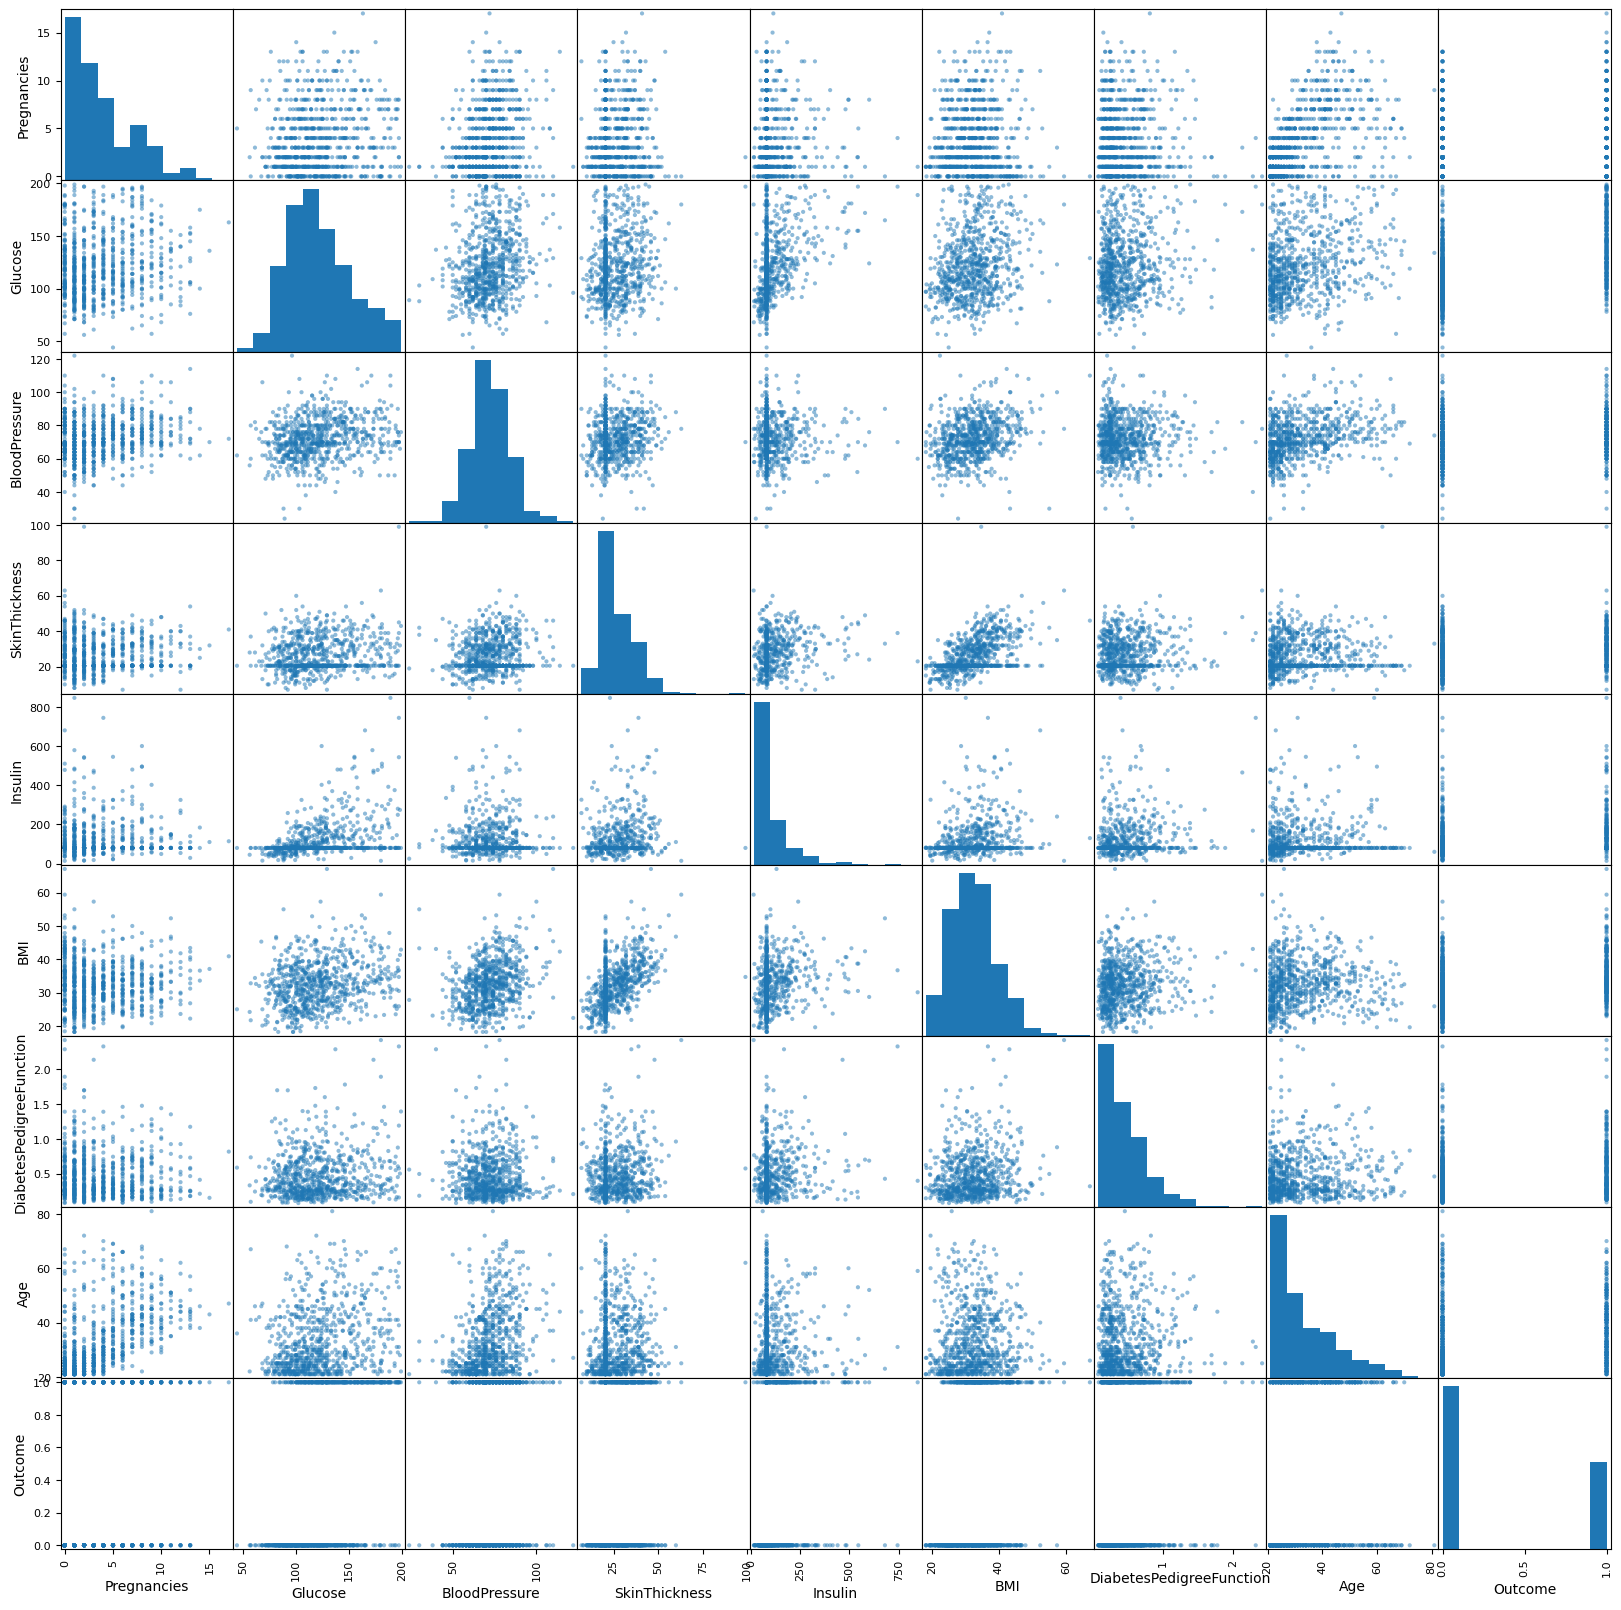

In [235]:
sns.reset_orig()
scatter_matrix(df, figsize=(20,20));
plt.show()

##### 4.1.4: Pair Plot

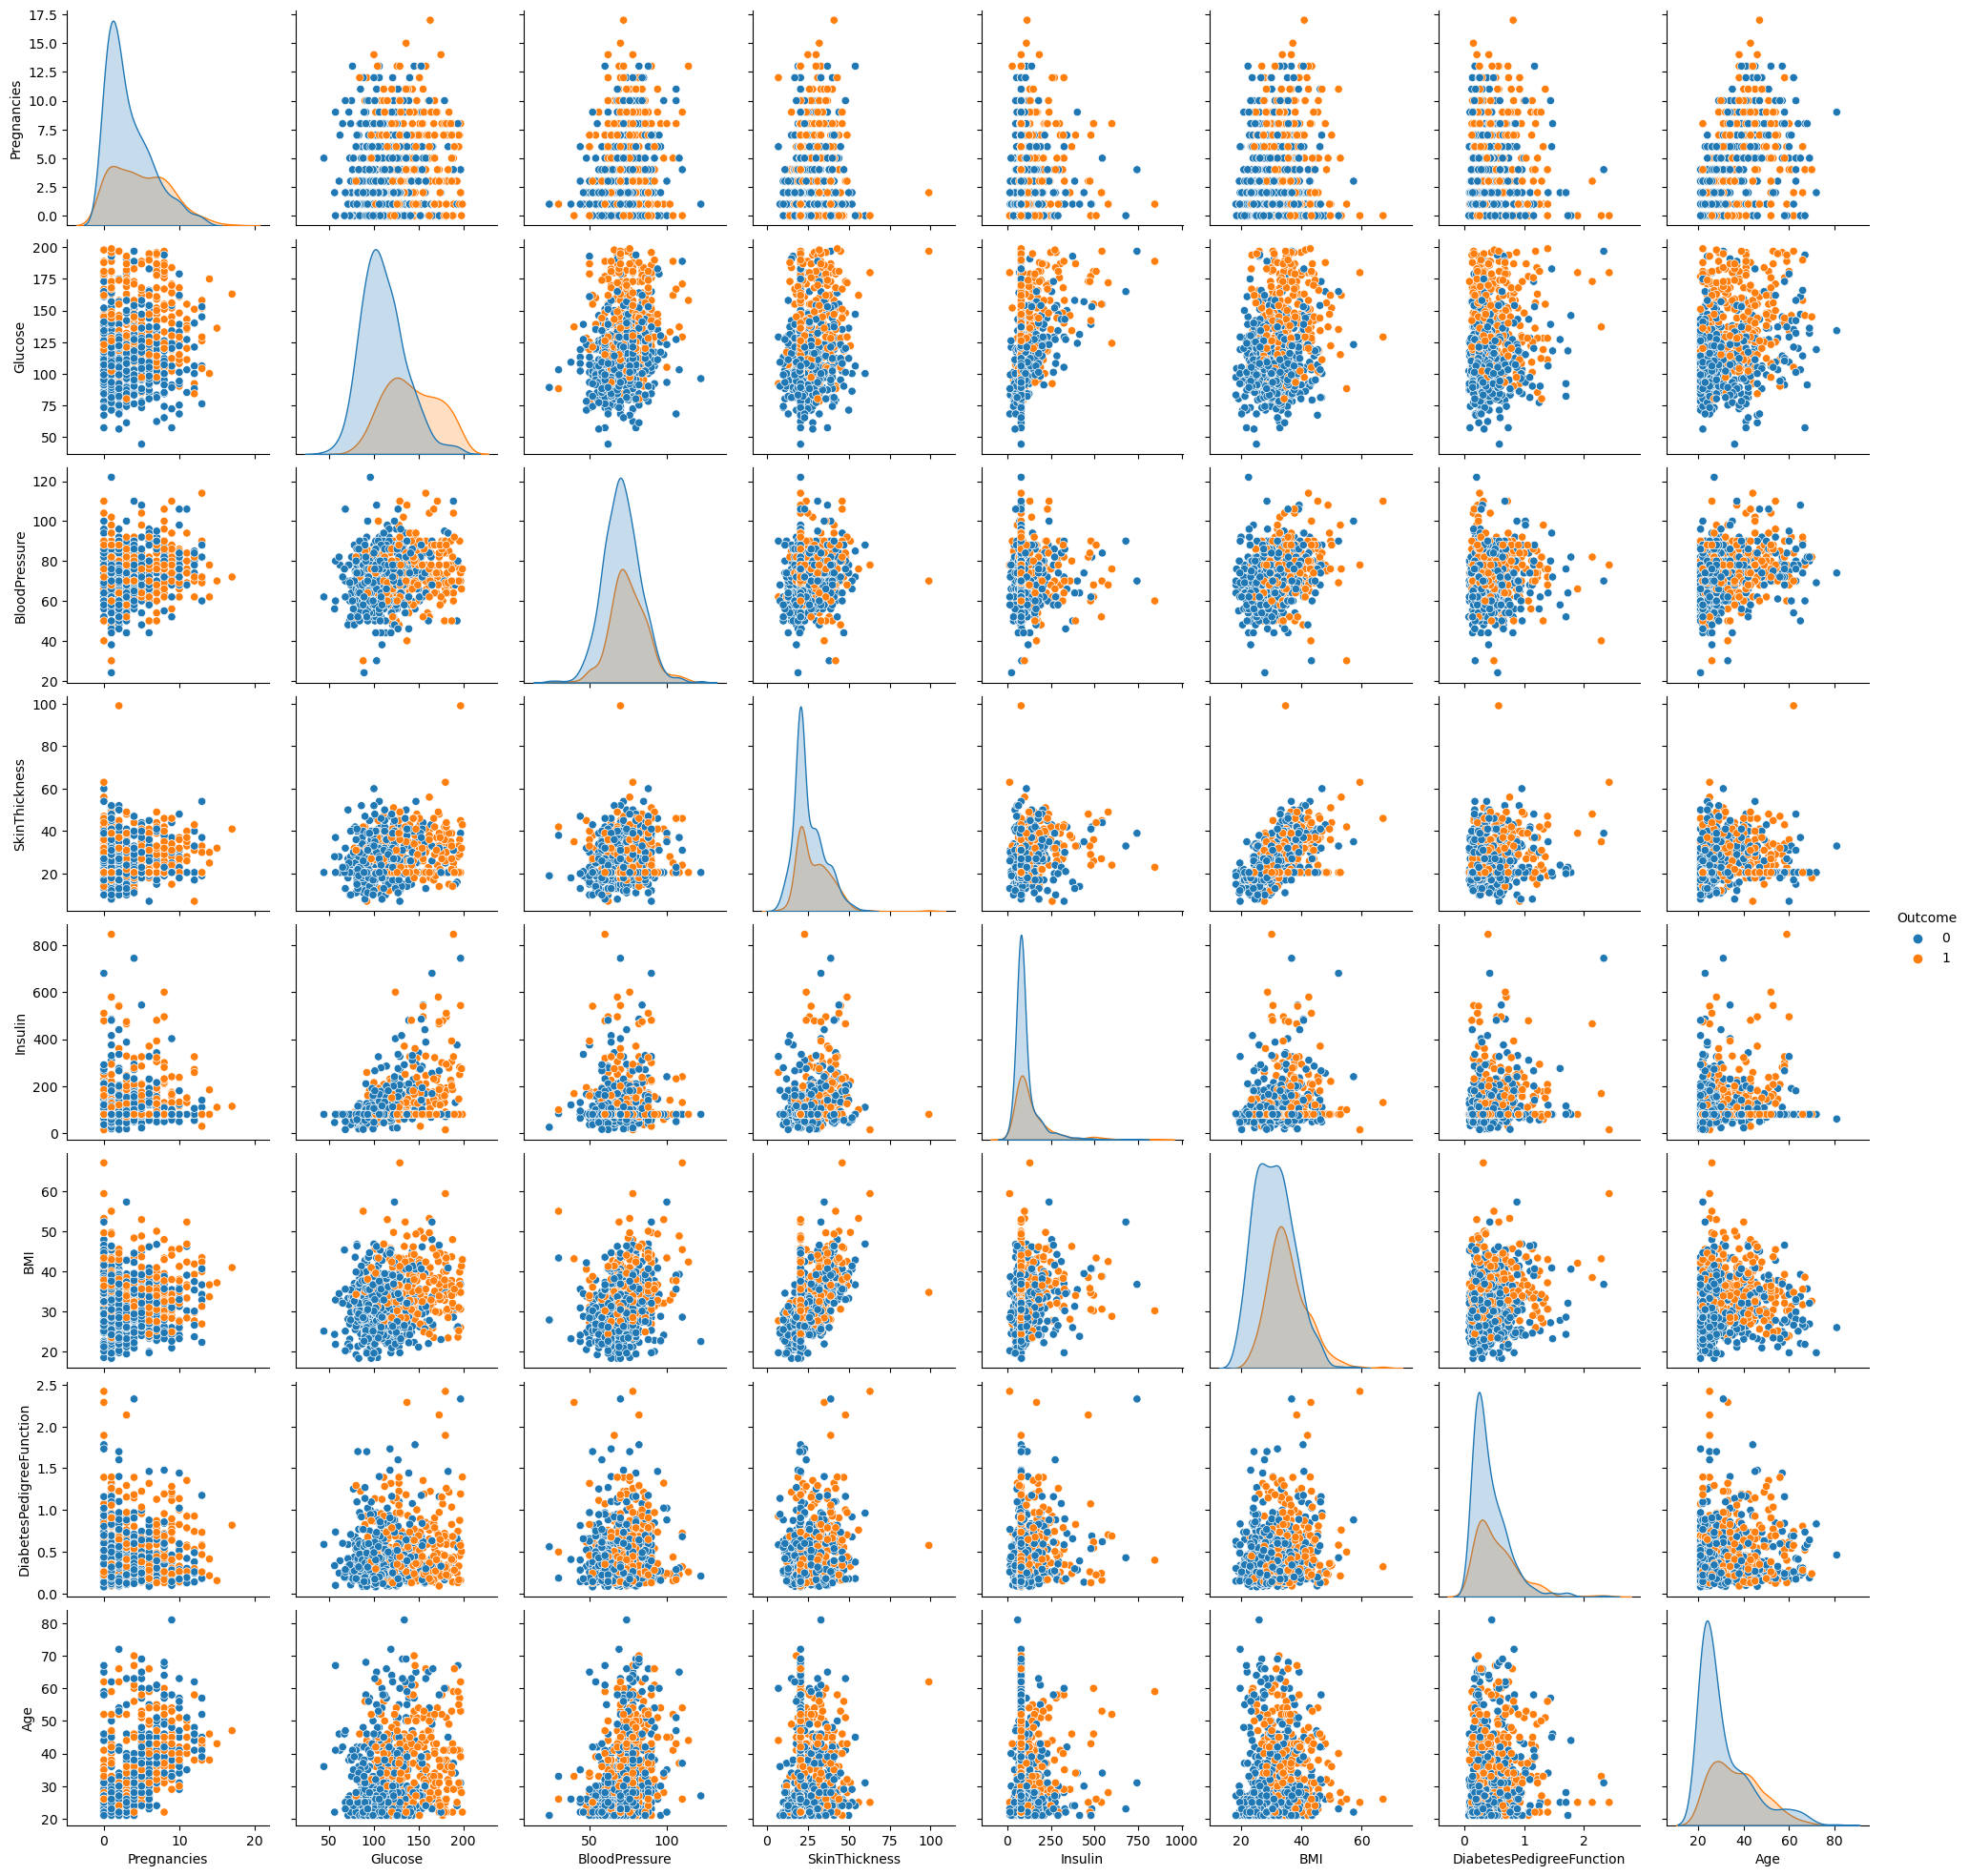

In [236]:
sns.pairplot(data = df, hue = 'Outcome' )
plt.show()

##### 4.1.5: Analyzing correlation between variables(Correlation Matrix)

In [288]:
sns.set()
corrmat= df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
g= sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="YlGnBu")

##### 4.1.6: Box Plot 

In [289]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=3)

<Axes: >

### 4.2: Data Cleaning

In [239]:
df.shape

(768, 9)

In [240]:
q = df['Pregnancies'].quantile(0.98)
# we are removing the top 2% data from the Pregnancies column
data_cleaned = df[df['Pregnancies']<q]
q = data_cleaned['BMI'].quantile(0.99)
# we are removing the top 1% data from the BMI column
data_cleaned  = data_cleaned[data_cleaned['BMI']<q]
q = data_cleaned['SkinThickness'].quantile(0.99)
# we are removing the top 1% data from the SkinThickness column
data_cleaned  = data_cleaned[data_cleaned['SkinThickness']<q]
q = data_cleaned['Insulin'].quantile(0.95)
# we are removing the top 5% data from the Insulin column
data_cleaned  = data_cleaned[data_cleaned['Insulin']<q]
q = data_cleaned['DiabetesPedigreeFunction'].quantile(0.99)
# we are removing the top 1% data from the DiabetesPedigreeFunction column
data_cleaned  = data_cleaned[data_cleaned['DiabetesPedigreeFunction']<q]
q = data_cleaned['Age'].quantile(0.99)
# we are removing the top 1% data from the Age column
dfc  = data_cleaned[data_cleaned['Age']<q]

In [241]:
dfc.shape

(674, 9)

In [242]:
diabetic = dfc[df['Outcome']==1]
non_diabetic = dfc[df['Outcome']==0]
diabetic.shape, non_diabetic.shape

((221, 9), (453, 9))

### 4.3: Data visualization after cleaning

##### 4.3.1: Pie Chart and Count Plot

Negative(0): 453
Positive(1): 221


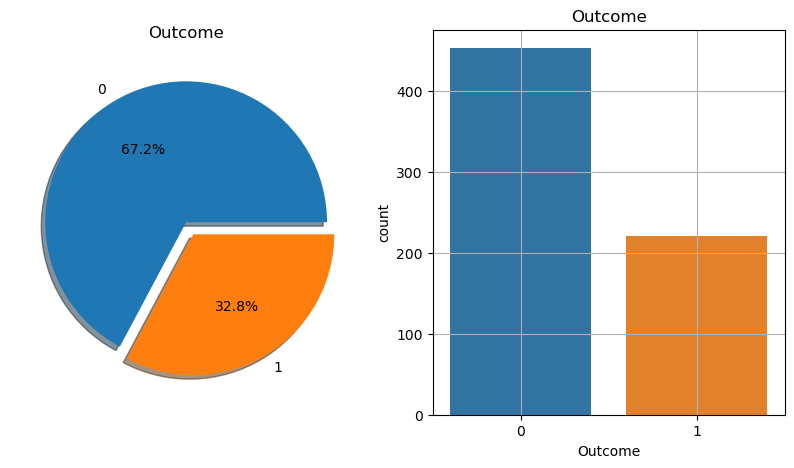

In [244]:
# Create subplots
f, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot pie chart on the first subplot
dfc['Outcome'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Outcome')
ax[0].set_ylabel('')

# Plot countplot on the second subplot
sns.countplot(x='Outcome', data=dfc, ax=ax[1])
ax[1].set_title('Outcome')

# Count the number of Negative (0) and Positive (1) outcomes
N, P = dfc['Outcome'].value_counts()
print('Negative(0):', N)
print('Positive(1):', P)

plt.grid()
plt.show()

##### 4.3.2: Histogram

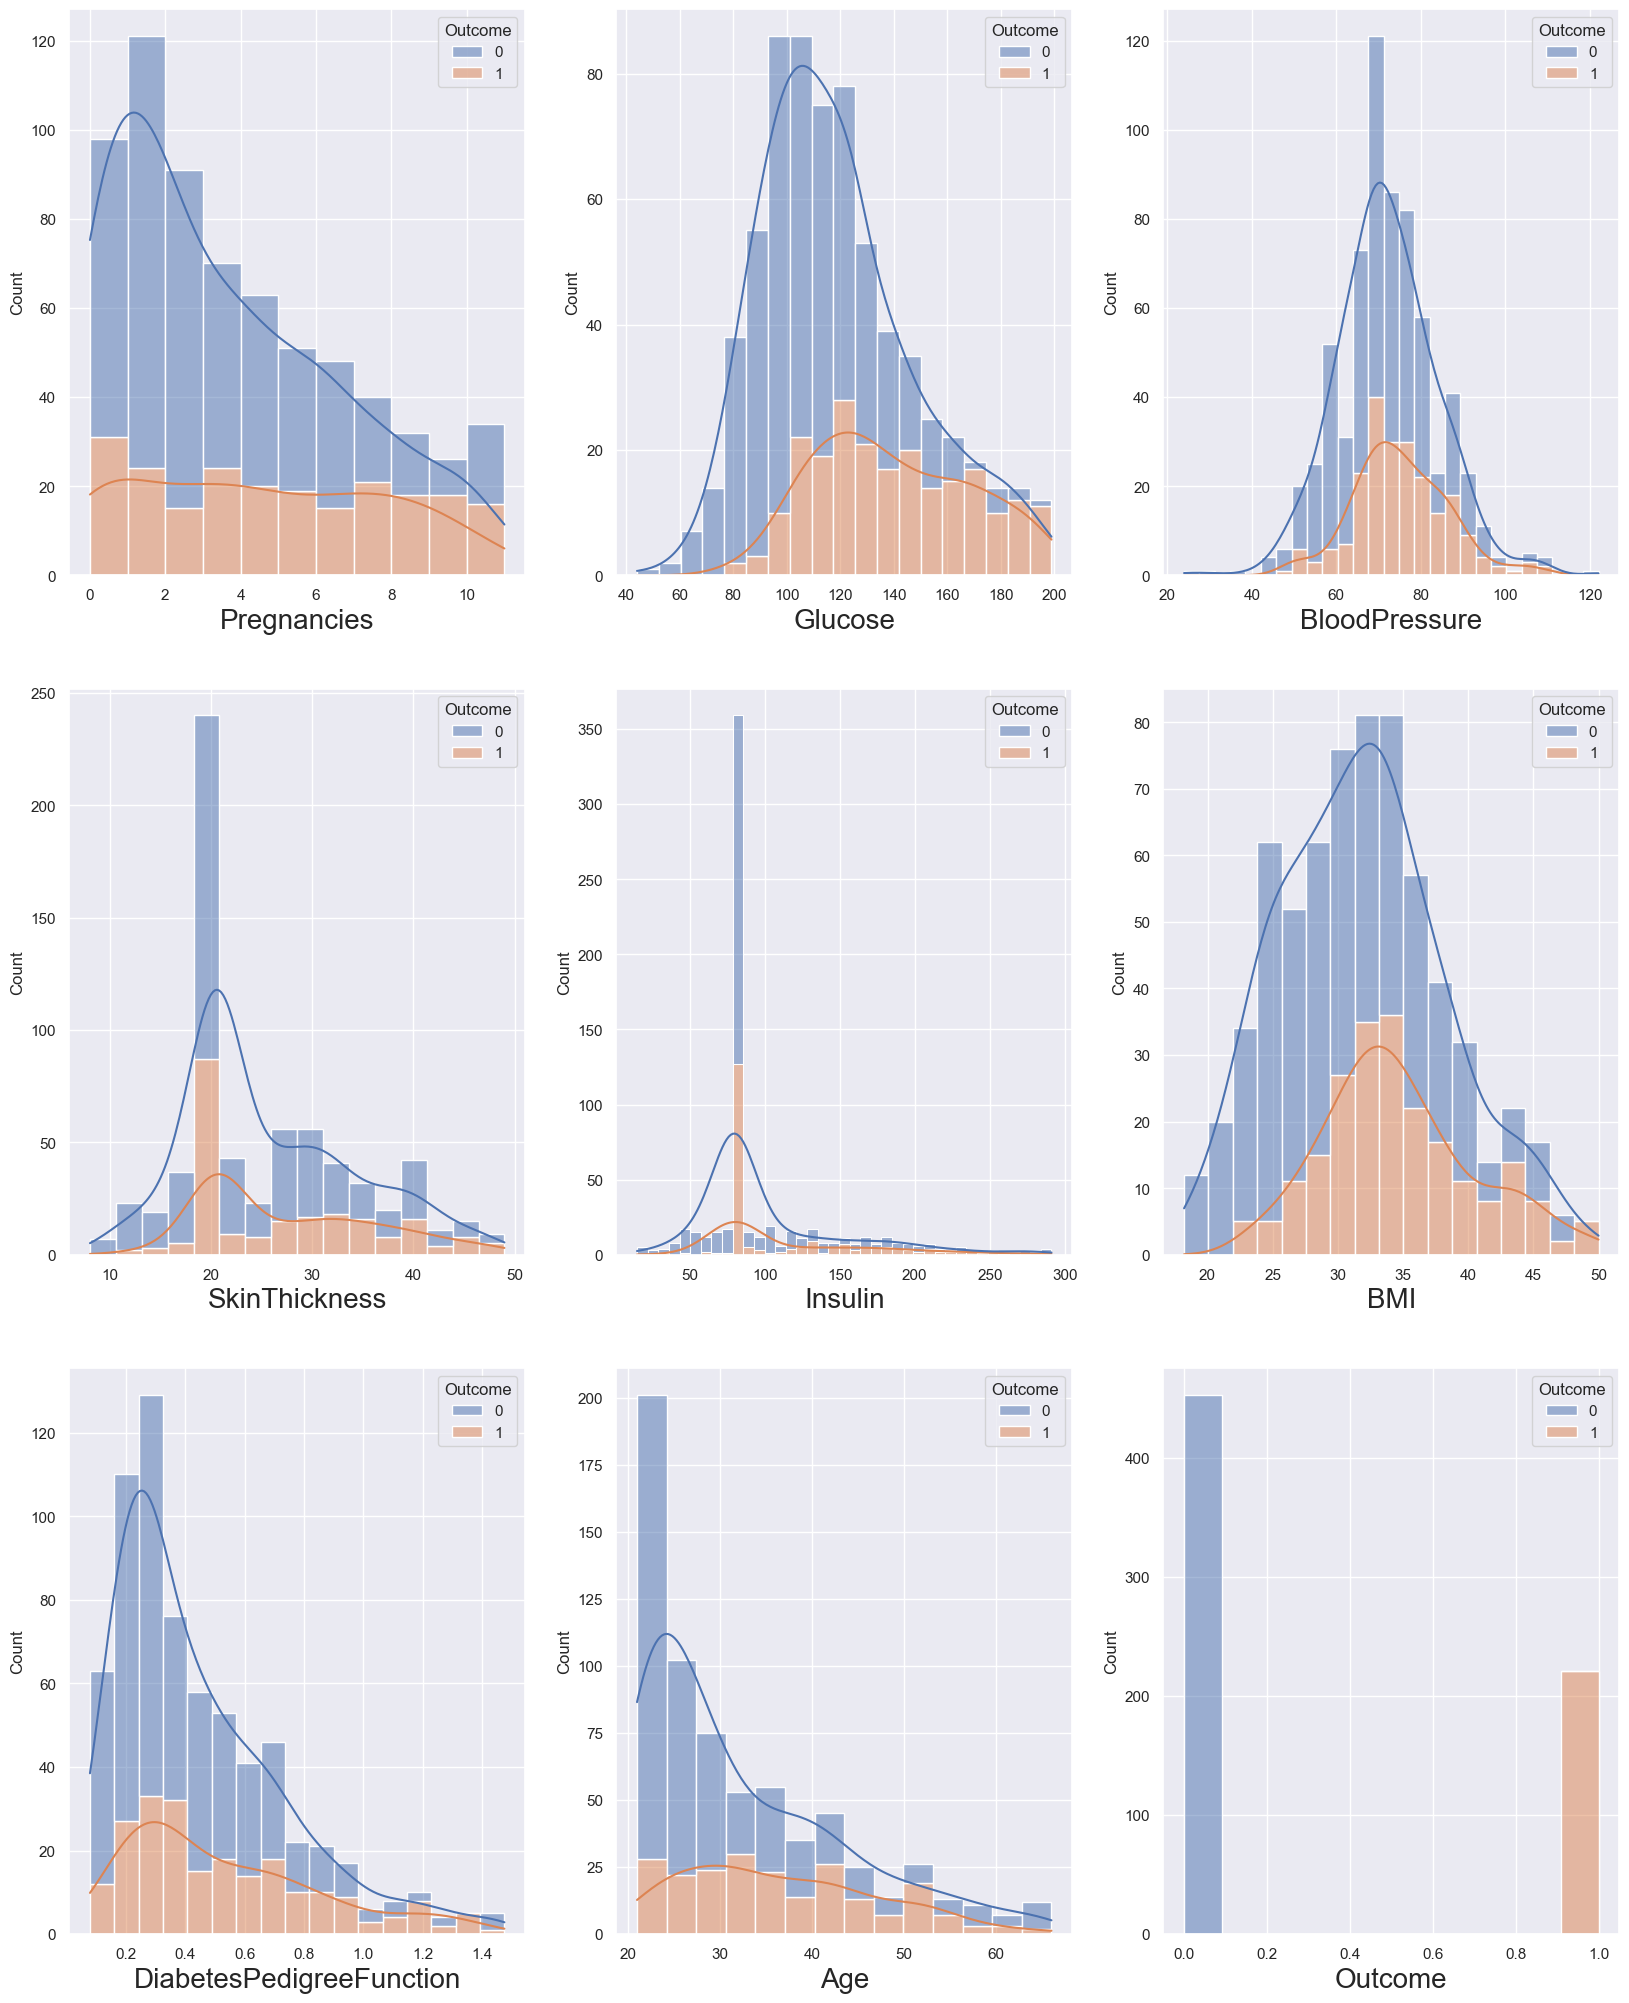

In [245]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
sns.set()
for column in data_cleaned:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.histplot(dfc, x=dfc[column], hue="Outcome", multiple='stack', kde=True)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

##### 4.3.3: Scatter Plot

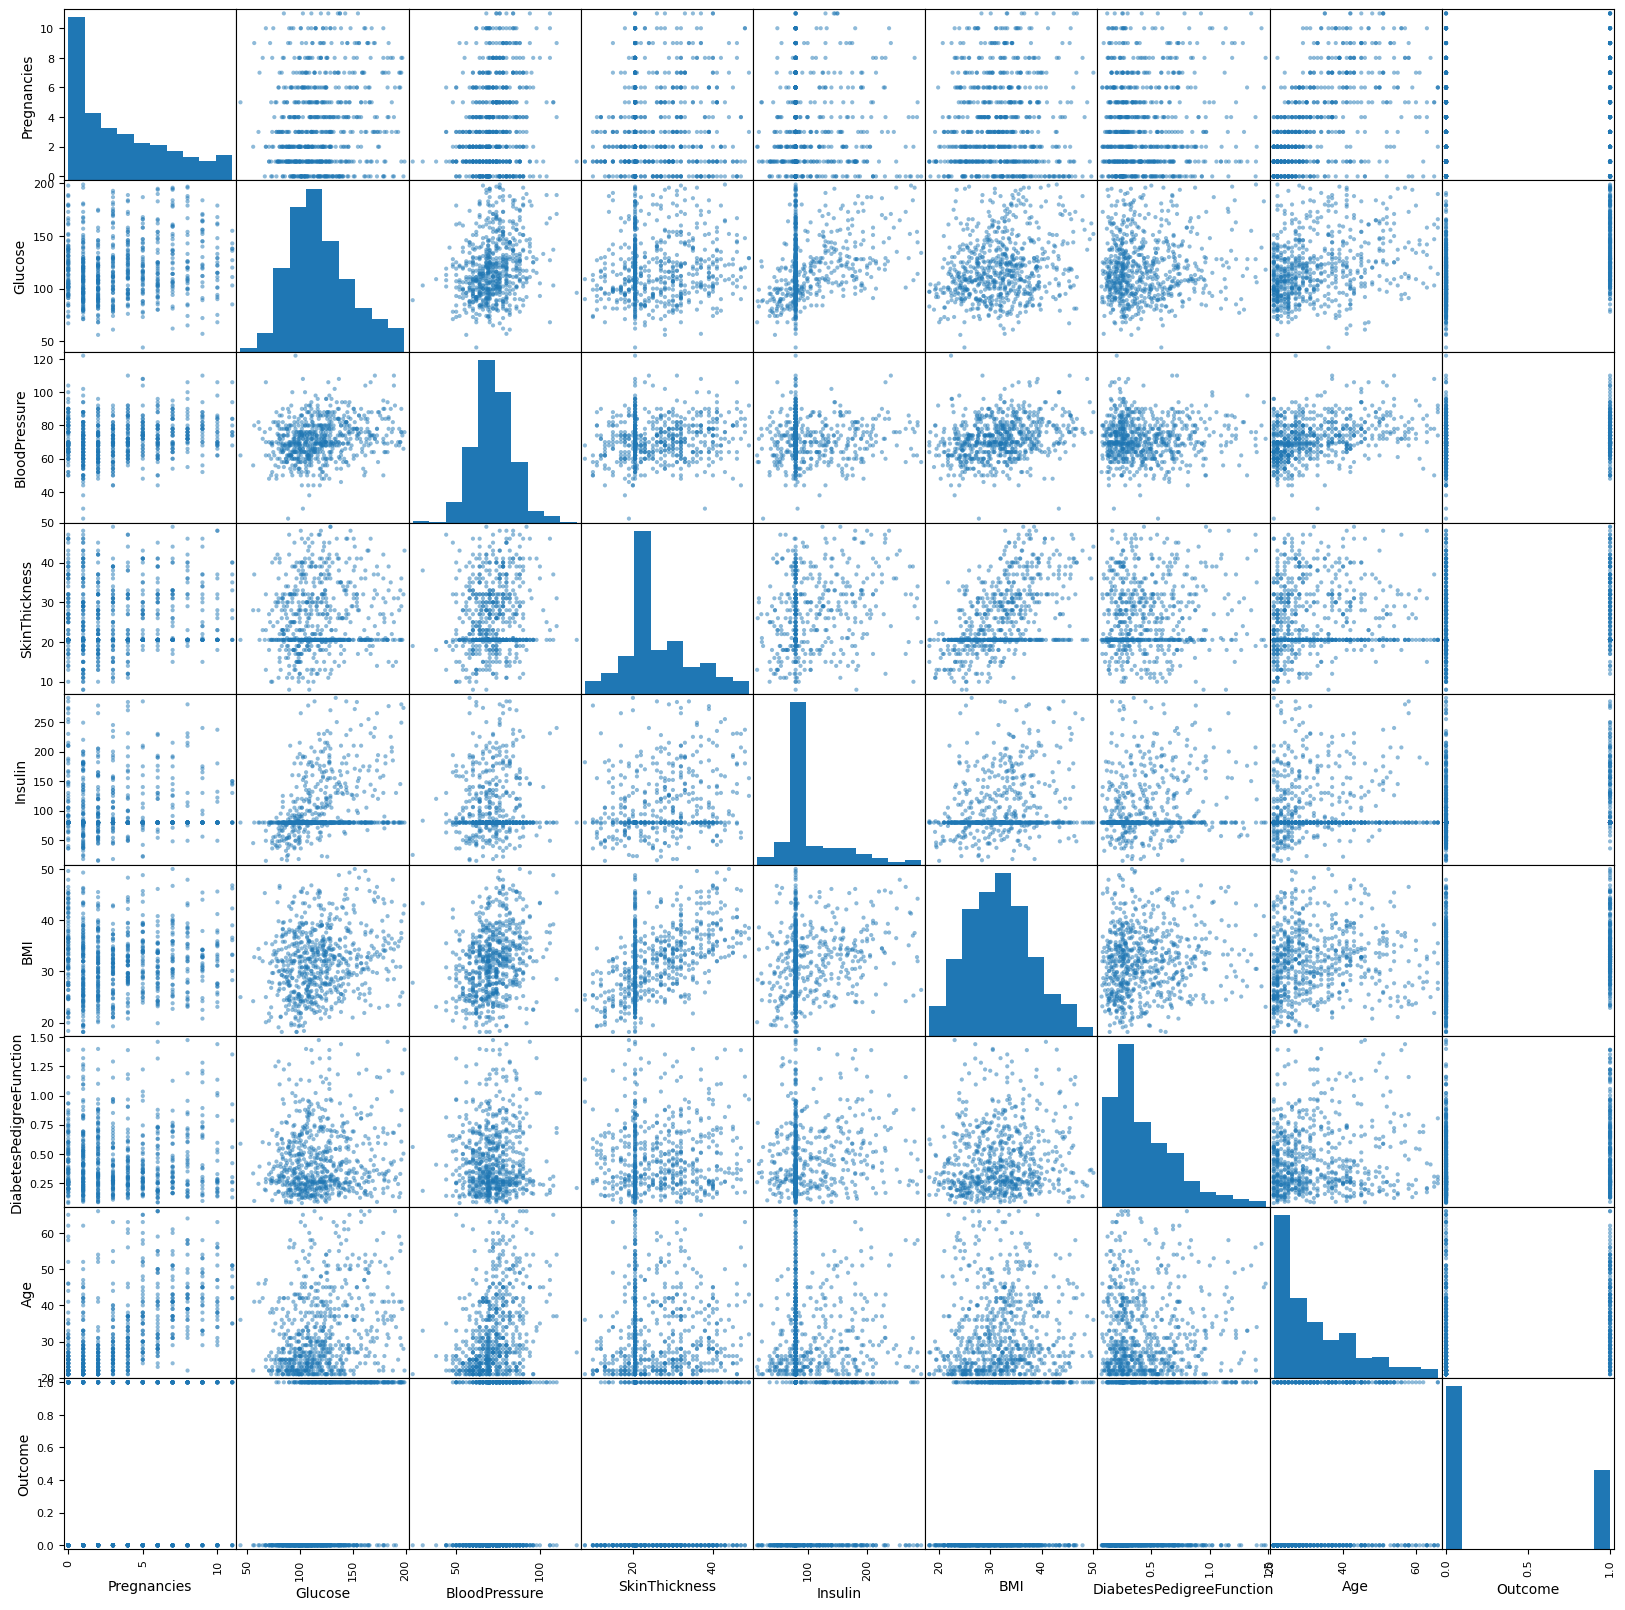

In [247]:
sns.reset_orig()
scatter_matrix(dfc, figsize=(20,20));
plt.show()

##### 4.3.4: Pair Plot

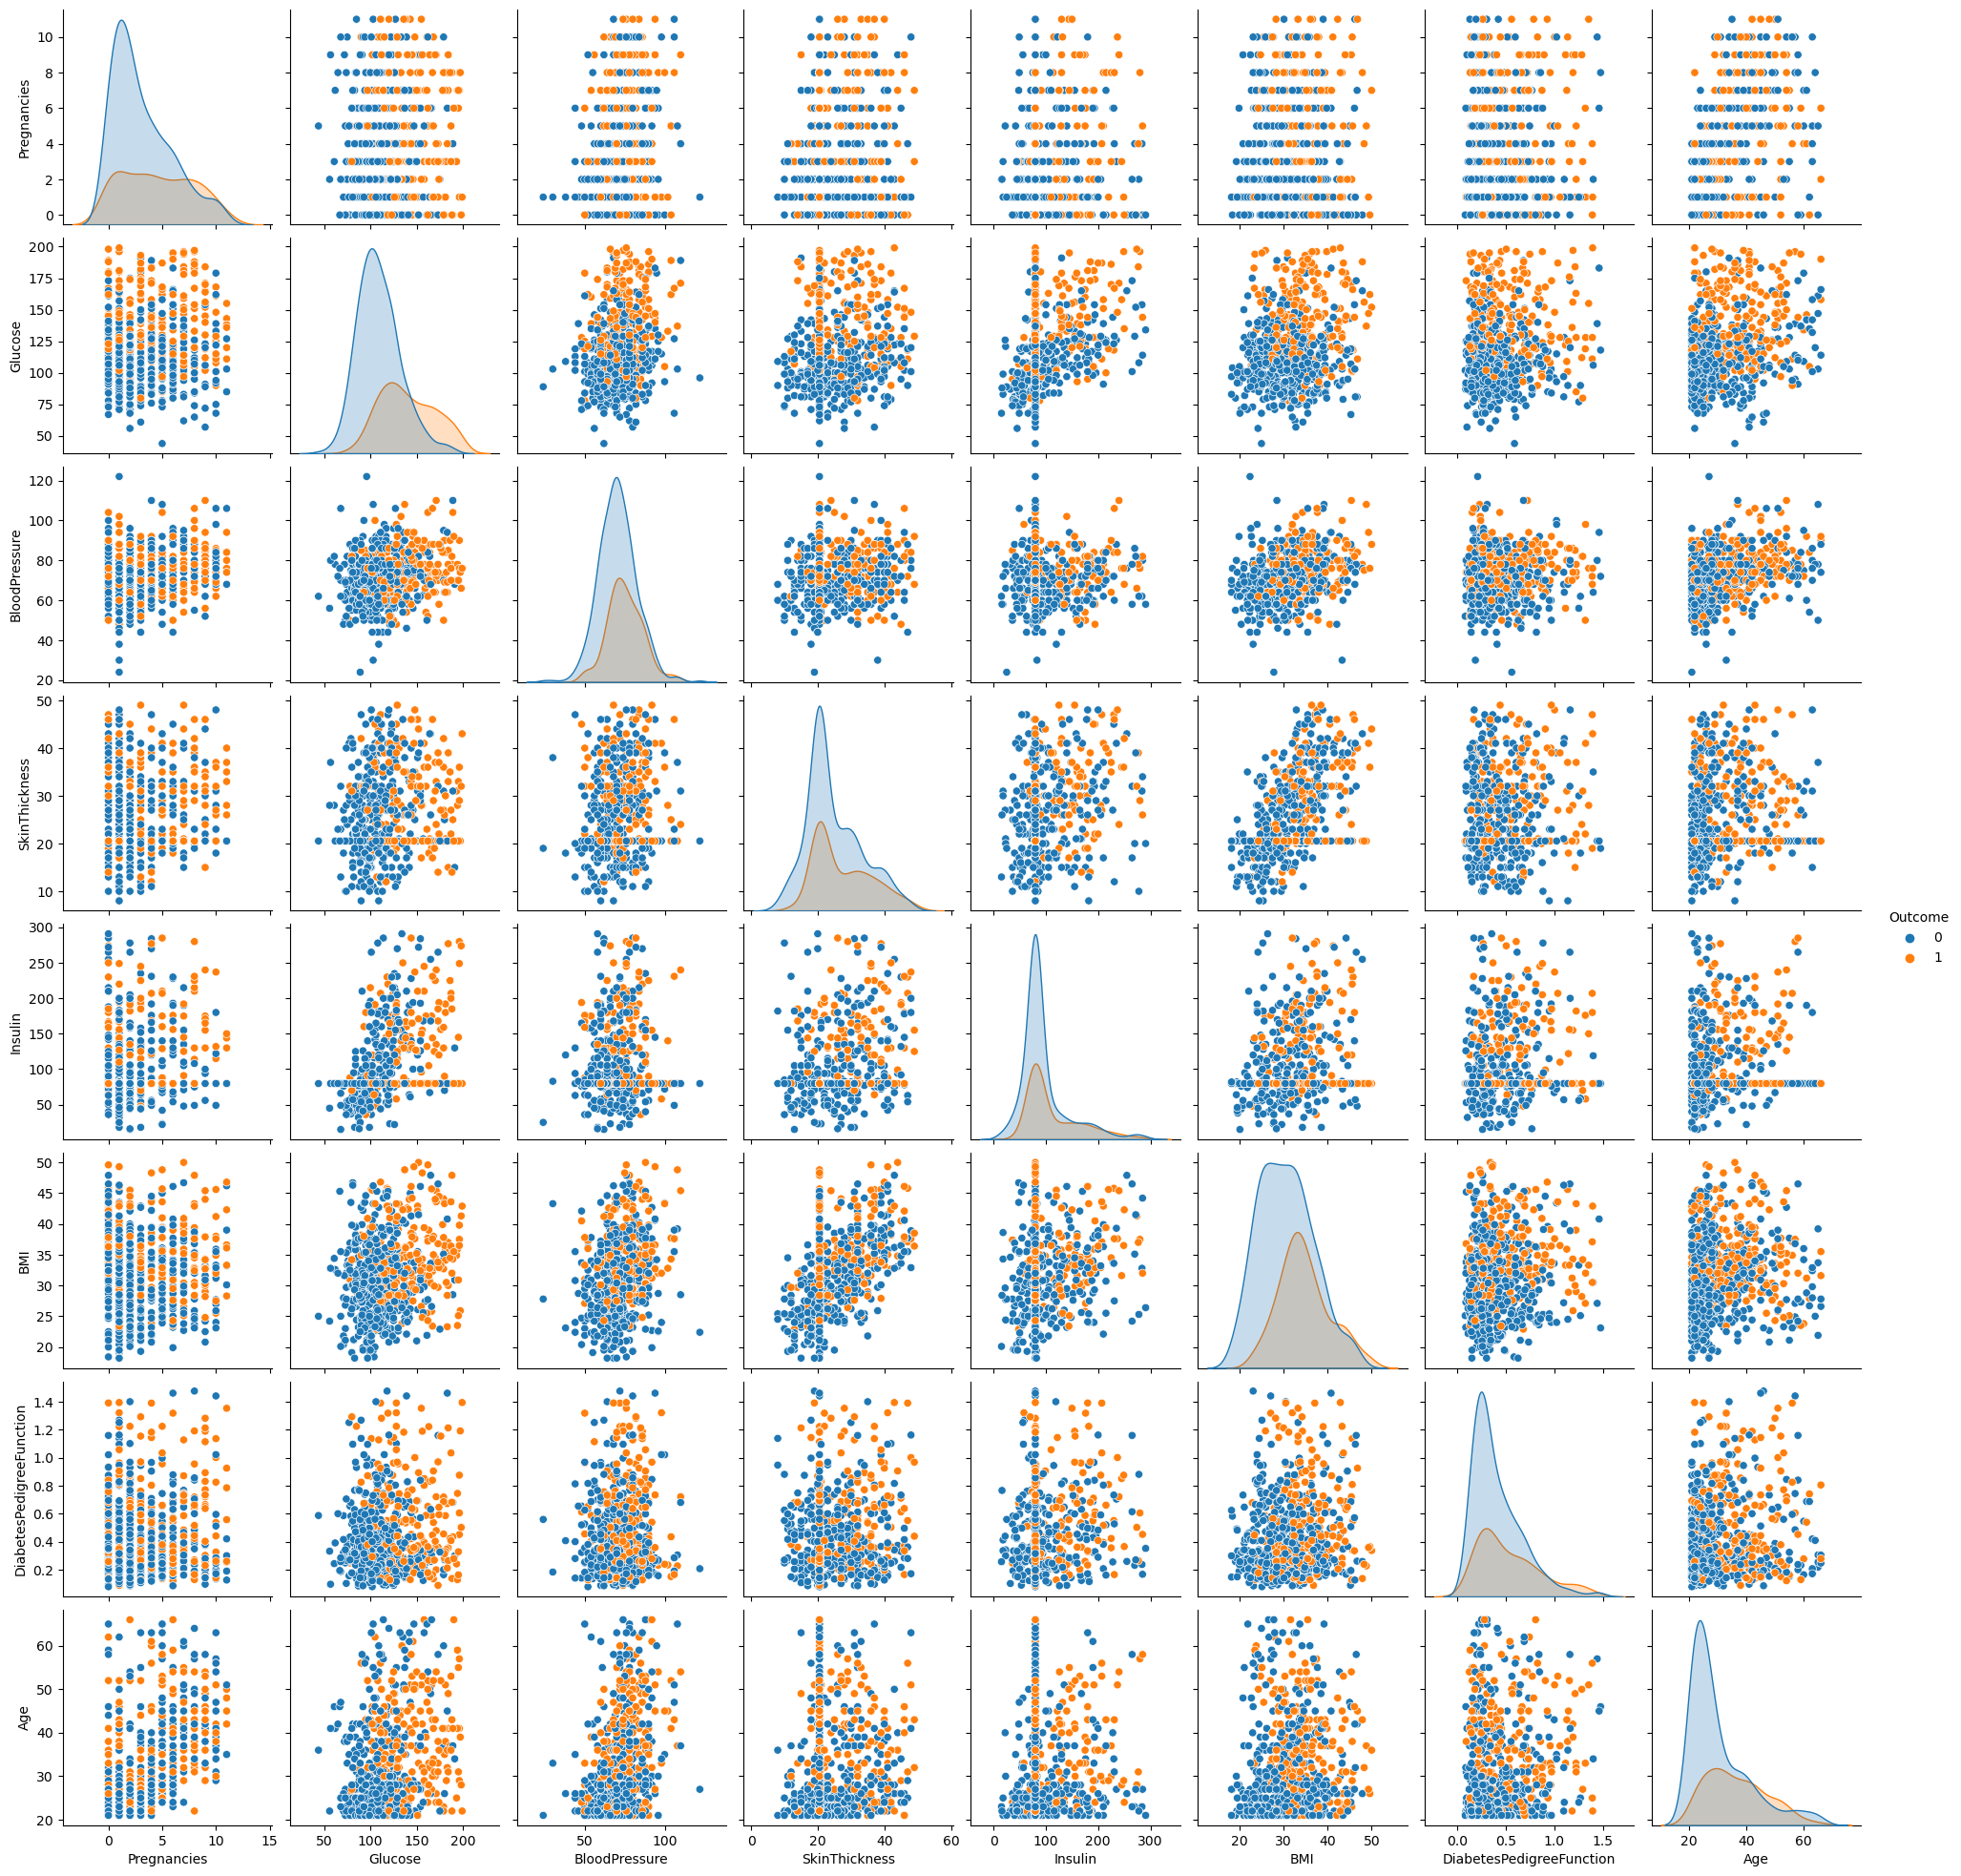

In [248]:
sns.pairplot(data = dfc, hue = 'Outcome' )
plt.show()

##### 4.3.5: Analyzing correlation between variables(Correlation Matrix)

In [258]:
corrmat= dfc.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
g= sns.heatmap(dfc[top_corr_features].corr(),annot=True,cmap="YlGnBu")

##### 4.3.6: Box Plot

In [260]:
fig, ax = plt.subplots(figsize=(15,15))
sns.boxplot(data=dfc, width= 0.5,ax=ax,  fliersize=3)

<Axes: >

# Step5: SPLIT THE DATA FRAME INTO X AND y

In [133]:
target_name = 'Outcome'
y= dfc[target_name]
X= dfc.drop(target_name, axis=1)

In [134]:
X.head()

Pregnancies  Glucose  BloodPressure  SkinThickness    Insulin   BMI  \
0            6    148.0           72.0      35.000000  79.799479  33.6   
1            1     85.0           66.0      29.000000  79.799479  26.6   
2            8    183.0           64.0      20.536458  79.799479  23.3   
3            1     89.0           66.0      23.000000  94.000000  28.1   
5            5    116.0           74.0      20.536458  79.799479  25.6   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
5                     0.201   30

In [135]:
y.head()

0    1
1    0
2    1
3    0
5    0
Name: Outcome, dtype: int64

# STEP6: APPLY FEATURE SCALING
Standardization scales the features such that they have a mean of 0 and a standard deviation of 1. The formula for standardization is: z = (x - mean) / standard deviation, where z is the standardized value, x is the original value, mean is the mean of the feature, and standard deviation is the standard deviation of the feature. Standardization is commonly used when the features have different scales and you want to bring them to a common scale to avoid the dominance of one feature over another in certain machine learning algorithms.

In [136]:
scaler = StandardScaler()
scaler.fit(X)
SSX= scaler.transform(X)

In [137]:
SSX

array([[ 7.96753910e-01,  9.83984062e-01,  4.52611463e-04, ...,
         2.65819648e-01,  6.30484542e-01,  1.60141519e+00],
       [-8.64793539e-01, -1.16977621e+00, -5.04474494e-01, ...,
        -8.31445036e-01, -3.38078670e-01, -1.32706484e-01],
       [ 1.46137289e+00,  2.18051755e+00, -6.72783529e-01, ...,
        -1.34872696e+00,  7.88402456e-01, -4.14369227e-02],
       ...,
       [ 4.64444420e-01,  6.09439465e-02,  4.52611463e-04, ...,
        -8.94145875e-01, -7.10063091e-01, -2.23976046e-01],
       [-8.64793539e-01,  2.31877301e-01, -1.00940160e+00, ...,
        -2.82812694e-01, -3.45097244e-01,  1.32760650e+00],
       [-8.64793539e-01, -8.96282840e-01, -1.67856424e-01, ...,
        -2.35787064e-01, -4.64413001e-01, -8.62862978e-01]])

In [138]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(SSX,i) for i in range(SSX.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

vif                  Features
0  1.449056               Pregnancies
1  1.304263                   Glucose
2  1.262686             BloodPressure
3  1.470049             SkinThickness
4  1.271017                   Insulin
5  1.513160                       BMI
6  1.042300  DiabetesPedigreeFunction
7  1.662728                       Age

# STEP7: TRAIN-TEST SPLIT

In [139]:
X_train, X_test, y_train, y_test = train_test_split(SSX, y, test_size=0.25, random_state=355)

In [140]:
X_train.shape, y_train.shape

((505, 8), (505,))

In [141]:
X_test.shape, y_test.shape

((169, 8), (169,))

# STEP8: BUILDING THE CLASSIFICATION ALGORITHM

### 8.1: Logistic Regression

In [142]:
lr= LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

### 8.2: KNeighbours Classifier(KNN)

In [143]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

### 8.3: Naive-Bayes Classifier

In [144]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

### 8.4: Support Vector Machine (SVM)

In [145]:
sv = SVC()
sv.fit(X_train, y_train)

SVC()

### 8.5: Decision Tree (DT)

In [146]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

### 8.6: Random Forest (RF)

In [147]:
rf = RandomForestClassifier(criterion='entropy')
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

### 8.7: GradientBoostingClassifier

In [148]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

### 8.8: AdaBoost Classifier

In [149]:
adab = AdaBoostClassifier(n_estimators=50, random_state=42)
adab.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

### 8.9: Extreme Gradient Boosting Classifier (XgBoost)

In [150]:
xgb = XGBClassifier(n_estimators=100,max_depth=3,learning_rate=0.1,random_state=42)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

### 8.10: LightGBM Classifier

In [151]:
lgbm = LGBMClassifier(n_estimators=100,max_depth=3,learning_rate=0.1,random_state=42)
lgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 169, number of negative: 336
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000174 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 575
[LightGBM] [Info] Number of data points in the train set: 505, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.334653 -> initscore=-0.687212
[LightGBM] [Info] Start training from score -0.687212
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

LGBMClassifier(max_depth=3, random_state=42)

### 8.11: CatBoost Classifier

In [152]:
cb = CatBoostClassifier(iterations=1000, learning_rate=0.0001, 
                        depth=7, 
                        random_seed=42, verbose=100)
cb.fit(X_train, y_train)

0:	learn: 0.6930911	total: 10.3ms	remaining: 10.3s
100:	learn: 0.6872883	total: 576ms	remaining: 5.13s
200:	learn: 0.6815808	total: 1.28s	remaining: 5.08s
300:	learn: 0.6760117	total: 2s	remaining: 4.66s
400:	learn: 0.6705256	total: 2.7s	remaining: 4.03s
500:	learn: 0.6652875	total: 3.39s	remaining: 3.38s
600:	learn: 0.6600473	total: 4.13s	remaining: 2.74s
700:	learn: 0.6549695	total: 4.9s	remaining: 2.09s
800:	learn: 0.6500165	total: 5.65s	remaining: 1.4s
900:	learn: 0.6451938	total: 6.47s	remaining: 711ms
999:	learn: 0.6403895	total: 7.23s	remaining: 0us


### 8.12: Guassian Process Classifier

In [153]:
kernel = 1.0 * RBF(length_scale=1.0)
gpc = GaussianProcessClassifier(kernel=kernel, random_state=42)

gpc.fit(X_train, y_train)

GaussianProcessClassifier(kernel=1**2 * RBF(length_scale=1), random_state=42)

### 8.13: Multilayer Perceptron Classifier

In [154]:
mlp = MLPClassifier(hidden_layer_sizes=(10,8,8,8,10,10))
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10, 8, 8, 8, 10, 10))

# STEP9: MODEL PREDICTION

### 9.1: Making prediction on test by using LR

In [155]:
lr_predict= lr.predict(X_test)

### 9.2: Making prediction on test by using KNN

In [156]:
knn_predict= knn.predict(X_test)

### 9.3: Making prediction on test by using NB

In [157]:
nb_predict= nb.predict(X_test)

### 9.4: Making prediction on test by using SVM

In [158]:
sv_predict= sv.predict(X_test)

### 9.5: Making prediction on test by using DT

In [159]:
dt_predict= dt.predict(X_test)

### 9.6: Making prediction on test by using RF

In [160]:
rf_predict= rf.predict(X_test)

### 9.7: Making prediction on test using Gradient Boosting Classifier

In [161]:
gb_predict=gb.predict(X_test)

### 9.8: Making prediction on test using AdaBoost Classifier

In [162]:
adab_predict=adab.predict(X_test)

### 9.9: Making prediction on test using XGB Classifier

In [163]:
xgb_predict=xgb.predict(X_test)

### 9.10: Making prediction on test using LGBM Classifier

In [164]:
lgbm_predict=lgbm.predict(X_test)

### 9.11: Making prediction on test using Categorical Boosting Classifier

In [165]:
cb_predict=cb.predict(X_test)

### 9.12: Making prediction on test using Guassian Process Classifier

In [166]:
gpc_predict=gpc.predict(X_test)

### 9.13: Making prediction on test using MLP Classifier

In [167]:
mlp_predict= mlp.predict(X_test)

# STEP10: MODEL EVALUATION

### 10.1: Logistic Regression

##### Train score, Test score and Misclassification rate

In [168]:
print("Train accuracy of logistic regression : ", lr.score(X_train, y_train)*100)
print("Accuracy (Test) score of logistic regression: ", lr.score(X_test, y_test)*100)
print("Accuracy (Test) score of logistic regression: ", accuracy_score(y_test, lr_predict)*100)
print("Misclassification rate of LR: ", 100-(accuracy_score(y_test, lr_predict)*100))

Train accuracy of logistic regression :  77.42574257425743
Accuracy (Test) score of logistic regression:  83.4319526627219
Accuracy (Test) score of logistic regression:  83.4319526627219
Misclassification rate of LR:  16.568047337278102


##### Confusion Matrix and Classification Report

In [2]:

lrcm =confusion_matrix(y_test, lr_predict)
plt.clf()
plt.imshow(lrcm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['0','1']
plt.title('Confusion Matrix of Logistic Regression')
plt.ylabel('Actual(True) values')
plt.xlabel('Predicted values')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s=[['TN', 'FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+"="+ str (lrcm[i][j]))
plt.show()

print('Classification report of Logistic Regression: \n',classification_report(y_test, lr_predict, digits=4))

NameError: name 'confusion_matrix' is not defined

### 10.2: K Nearest Neighbors

##### Train score, Test score and Misclassification rate

In [170]:
#Train score and test score of K Nearest Neighbors
print("Train accuracy of logistic regression : ", knn.score(X_train, y_train)*100)
print("Accuracy (Test) score of KNN: ", knn.score(X_test, y_test)*100)
print("Accuracy (Test) score of KNN: ", accuracy_score(y_test, knn_predict)*100)
print("Misclassification rate of KNN: ", 100-(accuracy_score(y_test, knn_predict)*100))

Train accuracy of logistic regression :  82.57425742574257
Accuracy (Test) score of KNN:  76.92307692307693
Accuracy (Test) score of KNN:  76.92307692307693
Misclassification rate of KNN:  23.076923076923066


##### Confusion Matrix and Classification Report

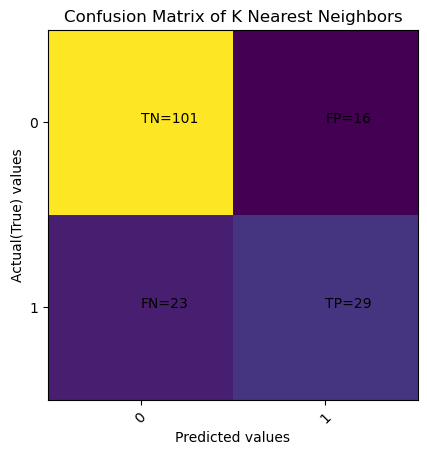

Classification report of KNN: 
               precision    recall  f1-score   support

           0     0.8145    0.8632    0.8382       117
           1     0.6444    0.5577    0.5979        52

    accuracy                         0.7692       169
   macro avg     0.7295    0.7105    0.7181       169
weighted avg     0.7622    0.7692    0.7643       169



In [171]:
#Confusion Matrix for KNN
knncm =confusion_matrix(y_test, knn_predict)
plt.clf()
plt.imshow(knncm, interpolation='nearest', cmap=plt.cm.viridis)
classNames = ['0','1']
plt.title('Confusion Matrix of K Nearest Neighbors')
plt.ylabel('Actual(True) values')
plt.xlabel('Predicted values')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s=[['TN', 'FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+"="+ str (knncm[i][j]))
plt.show()

#Classification report of KNN
print('Classification report of KNN: \n',classification_report(y_test, knn_predict, digits=4))

### 10.3: Naive-Bayes

##### Train score, Test score and Misclassification rate

In [172]:
#Train score and test score of Naive Bayes
print("Train accuracy of logistic regression : ", nb.score(X_train, y_train)*100)
print("Accuracy (Test) score of NB: ", nb.score(X_test, y_test)*100)
print("Accuracy (Test) score of NB: ", accuracy_score(y_test, nb_predict)*100)
print("Misclassification rate of NB: ", 100-(accuracy_score(y_test, nb_predict)*100))

Train accuracy of logistic regression :  76.23762376237624
Accuracy (Test) score of NB:  76.33136094674556
Accuracy (Test) score of NB:  76.33136094674556
Misclassification rate of NB:  23.668639053254438


##### Confusion Matrix and Classification Report

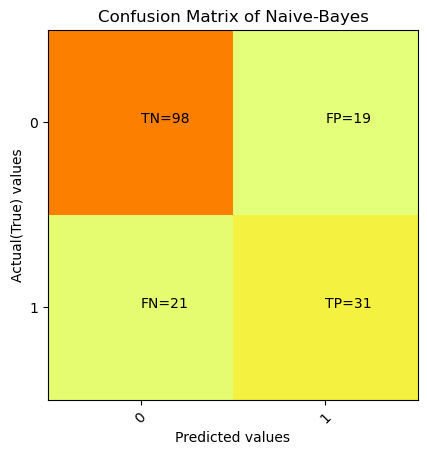

Classification report of Naive-Bayes: 
               precision    recall  f1-score   support

           0     0.8235    0.8376    0.8305       117
           1     0.6200    0.5962    0.6078        52

    accuracy                         0.7633       169
   macro avg     0.7218    0.7169    0.7192       169
weighted avg     0.7609    0.7633    0.7620       169



In [173]:
#Confusion Matrix for Naive-Bayes
nbcm =confusion_matrix(y_test, nb_predict)
plt.clf()
plt.imshow(nbcm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['0','1']
plt.title('Confusion Matrix of Naive-Bayes')
plt.ylabel('Actual(True) values')
plt.xlabel('Predicted values')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s=[['TN', 'FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+"="+ str (nbcm[i][j]))
plt.show()

#Classification report of Naive-Bayes
print('Classification report of Naive-Bayes: \n',classification_report(y_test, nb_predict, digits=4))

### 10.4: Support Vector Machine 

##### Train score, Test score and Misclassification rate

In [174]:
#Train score and test score of Support Vector Machine
print("Train accuracy of logistic regression : ", sv.score(X_train, y_train)*100)
print("Accuracy (Test) score of SVM: ", sv.score(X_test, y_test)*100)
print("Accuracy (Test) score of SVM: ", accuracy_score(y_test, sv_predict)*100)
print("Misclassification rate of SVM: ", 100-(accuracy_score(y_test, sv_predict)*100))

Train accuracy of logistic regression :  83.76237623762376
Accuracy (Test) score of SVM:  80.4733727810651
Accuracy (Test) score of SVM:  80.4733727810651
Misclassification rate of SVM:  19.526627218934905


##### Confusion Matrix and Classification Report

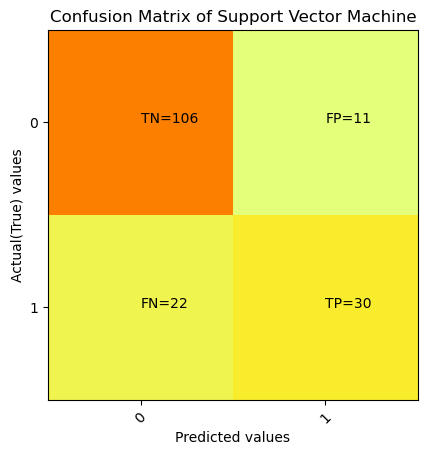

Classification report of Support Vector Machine: 
               precision    recall  f1-score   support

           0     0.8281    0.9060    0.8653       117
           1     0.7317    0.5769    0.6452        52

    accuracy                         0.8047       169
   macro avg     0.7799    0.7415    0.7552       169
weighted avg     0.7985    0.8047    0.7976       169



In [175]:
#Confusion Matrix for SVM
svcm =confusion_matrix(y_test, sv_predict)
plt.clf()
plt.imshow(svcm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['0','1']
plt.title('Confusion Matrix of Support Vector Machine')
plt.ylabel('Actual(True) values')
plt.xlabel('Predicted values')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s=[['TN', 'FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+"="+ str (svcm[i][j]))
plt.show()

#Classification report of SVM
print('Classification report of Support Vector Machine: \n',classification_report(y_test, sv_predict, digits=4))

### 10.5: Decision Tree

##### Train score, Test score and Misclassification rate

In [176]:
#Train score and test score of Decision Tree
print("Train accuracy of logistic regression : ", dt.score(X_train, y_train)*100)
print("Accuracy (Test) score of DT: ", dt.score(X_test, y_test)*100)
print("Accuracy (Test) score of DT: ", accuracy_score(y_test, dt_predict)*100)
print("Misclassification rate of DT: ", 100-(accuracy_score(y_test, dt_predict)*100))

Train accuracy of logistic regression :  100.0
Accuracy (Test) score of DT:  62.721893491124256
Accuracy (Test) score of DT:  62.721893491124256
Misclassification rate of DT:  37.278106508875744


##### Confusion Matrix and Classification Report

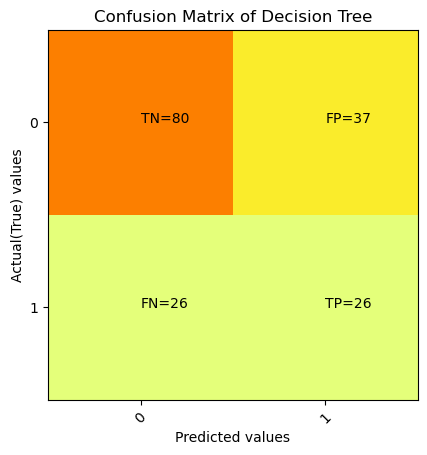

Classification report of Decision Tree: 
               precision    recall  f1-score   support

           0     0.7547    0.6838    0.7175       117
           1     0.4127    0.5000    0.4522        52

    accuracy                         0.6272       169
   macro avg     0.5837    0.5919    0.5848       169
weighted avg     0.6495    0.6272    0.6359       169



In [177]:
#Confusion Matrix for DT
dtcm =confusion_matrix(y_test, dt_predict)
plt.clf()
plt.imshow(dtcm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['0','1']
plt.title('Confusion Matrix of Decision Tree')
plt.ylabel('Actual(True) values')
plt.xlabel('Predicted values')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s=[['TN', 'FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+"="+ str (dtcm[i][j]))
plt.show()

#Classification report of Decision Tree
print('Classification report of Decision Tree: \n',classification_report(y_test, dt_predict, digits=4))

### 10.6: Random Forest

##### Train score, Test score and Misclassification rate

In [178]:
#Train score and test score of Random Forest
print("Train accuracy of RF : ", rf.score(X_train, y_train)*100)
print("Accuracy (Test) score of RF: ", rf.score(X_test, y_test)*100)
print("Accuracy (Test) score of RF: ", accuracy_score(y_test, rf_predict)*100)
print("Misclassification rate of RF: ", 100-(accuracy_score(y_test, rf_predict)*100))

Train accuracy of RF :  100.0
Accuracy (Test) score of RF:  81.06508875739645
Accuracy (Test) score of RF:  81.06508875739645
Misclassification rate of RF:  18.934911242603548


##### Confusion Matrix and Classification Report

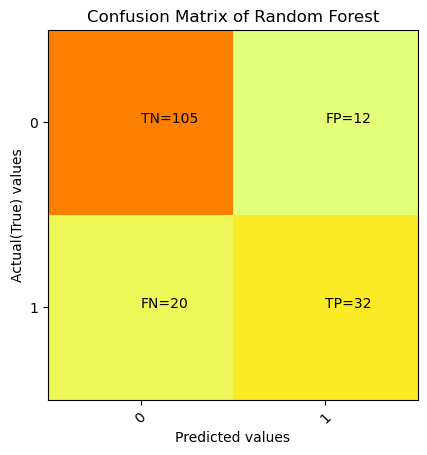

Classification report of Random Forest: 
               precision    recall  f1-score   support

           0     0.8400    0.8974    0.8678       117
           1     0.7273    0.6154    0.6667        52

    accuracy                         0.8107       169
   macro avg     0.7836    0.7564    0.7672       169
weighted avg     0.8053    0.8107    0.8059       169



In [179]:
#Confusion Matrix for RF
rfcm =confusion_matrix(y_test, rf_predict)
plt.clf()
plt.imshow(rfcm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['0','1']
plt.title('Confusion Matrix of Random Forest')
plt.ylabel('Actual(True) values')
plt.xlabel('Predicted values')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s=[['TN', 'FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+"="+ str (rfcm[i][j]))
plt.show()

#Classification report of RF
print('Classification report of Random Forest: \n',classification_report(y_test, rf_predict, digits=4))

### 10.7: Gradient Boosting Classifier

##### Train score, Test score and Misclassification rate

In [180]:
#Train score and test score of Gradient Boosting Classifier
print("Train accuracy of Gradient Boosting Classifier : ", gb.score(X_train, y_train)*100)
print("Accuracy (Test) score of Gradient Boosting Classifier: ", gb.score(X_test, y_test)*100)
print("Accuracy (Test) score of Gradient Boosting Classifier: ", accuracy_score(y_test, gb_predict)*100)
print("Misclassification rate of Gradient Boosting Classifier: ", 100-(accuracy_score(y_test, gb_predict)*100))

Train accuracy of Gradient Boosting Classifier :  94.45544554455445
Accuracy (Test) score of Gradient Boosting Classifier:  82.84023668639054
Accuracy (Test) score of Gradient Boosting Classifier:  82.84023668639054
Misclassification rate of Gradient Boosting Classifier:  17.15976331360946


##### Confusion Matrix and Classification Report

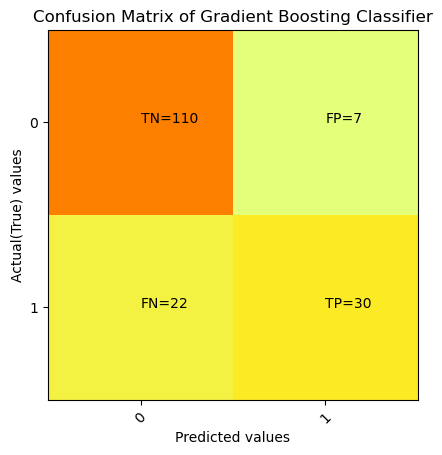

Classification report of Gradient Boosting Classifer: 
               precision    recall  f1-score   support

           0     0.8333    0.9402    0.8835       117
           1     0.8108    0.5769    0.6742        52

    accuracy                         0.8284       169
   macro avg     0.8221    0.7585    0.7788       169
weighted avg     0.8264    0.8284    0.8191       169



In [181]:
#Confusion Matrix for Gradient Boosting classifier
gbcm =confusion_matrix(y_test, gb_predict)
plt.clf()
plt.imshow(gbcm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['0','1']
plt.title('Confusion Matrix of Gradient Boosting Classifier')
plt.ylabel('Actual(True) values')
plt.xlabel('Predicted values')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s=[['TN', 'FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+"="+ str (gbcm[i][j]))
plt.show()

#Classification report of Gradient Boosting Classifier
print('Classification report of Gradient Boosting Classifer: \n',classification_report(y_test, gb_predict, digits=4))

### 10.8: AdaBoost Classifier

##### Train score, Test score and Misclassification rate

In [182]:
#Train score and test score of AdaBoost Classifier
print("Train accuracy of AdaBoost Classifier : ", adab.score(X_train, y_train)*100)
print("Accuracy (Test) score of AdaBoost Classifier: ", adab.score(X_test, y_test)*100)
print("Accuracy (Test) score of AdaBoost Classifier: ", accuracy_score(y_test, adab_predict)*100)
print("Misclassification rate of AdaBoost Classifier: ", 100-(accuracy_score(y_test, adab_predict)*100))

Train accuracy of AdaBoost Classifier :  83.76237623762376
Accuracy (Test) score of AdaBoost Classifier:  80.4733727810651
Accuracy (Test) score of AdaBoost Classifier:  80.4733727810651
Misclassification rate of AdaBoost Classifier:  19.526627218934905


##### Confusion Matrix and Classification Report

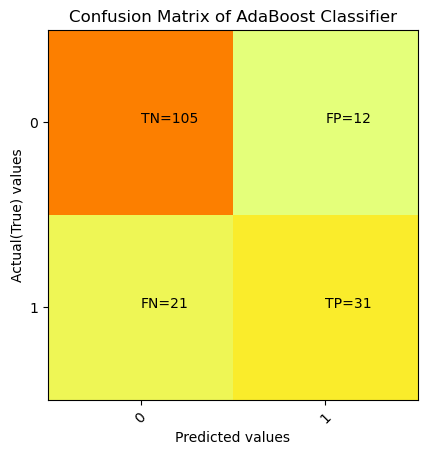

Classification report of AdaBoost Classifer: 
               precision    recall  f1-score   support

           0     0.8333    0.8974    0.8642       117
           1     0.7209    0.5962    0.6526        52

    accuracy                         0.8047       169
   macro avg     0.7771    0.7468    0.7584       169
weighted avg     0.7987    0.8047    0.7991       169



In [183]:
#Confusion Matrix for AdaBoost classifier
adabcm =confusion_matrix(y_test, adab_predict)
plt.clf()
plt.imshow(adabcm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['0','1']
plt.title('Confusion Matrix of AdaBoost Classifier')
plt.ylabel('Actual(True) values')
plt.xlabel('Predicted values')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s=[['TN', 'FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+"="+ str (adabcm[i][j]))
plt.show()

#Classification report of AdaBoost Classifier
print('Classification report of AdaBoost Classifer: \n',classification_report(y_test, adab_predict, digits=4))

### 10.9: XGBoost Classifier

##### Train score, Test score and Misclassification rate

In [184]:
#Train score and test score of XGB Classifier
print("Train accuracy of XGB Classifier : ", xgb.score(X_train, y_train)*100)
print("Accuracy (Test) score of XGB Classifier: ", xgb.score(X_test, y_test)*100)
print("Accuracy (Test) score of XGB Classifier: ", accuracy_score(y_test, xgb_predict)*100)
print("Misclassification rate of XGB Classifier: ", 100-(accuracy_score(y_test, xgb_predict)*100))

Train accuracy of XGB Classifier :  89.9009900990099
Accuracy (Test) score of XGB Classifier:  83.4319526627219
Accuracy (Test) score of XGB Classifier:  83.4319526627219
Misclassification rate of XGB Classifier:  16.568047337278102


##### Confusion Matrix and Classification Report

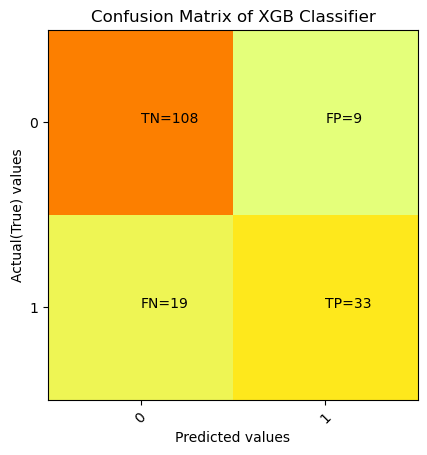

Classification report of XGB Classifer: 
               precision    recall  f1-score   support

           0     0.8504    0.9231    0.8852       117
           1     0.7857    0.6346    0.7021        52

    accuracy                         0.8343       169
   macro avg     0.8181    0.7788    0.7937       169
weighted avg     0.8305    0.8343    0.8289       169



In [185]:
#Confusion Matrix for xgb classifier
xgbcm =confusion_matrix(y_test, xgb_predict)
plt.clf()
plt.imshow(xgbcm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['0','1']
plt.title('Confusion Matrix of XGB Classifier')
plt.ylabel('Actual(True) values')
plt.xlabel('Predicted values')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s=[['TN', 'FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+"="+ str (xgbcm[i][j]))
plt.show()

#Classification report of xgb Classifier
print('Classification report of XGB Classifer: \n',classification_report(y_test, xgb_predict, digits=4))

### 10.10: LightGBM Classifier

##### Train score, Test score and Misclassification rate

In [186]:
#Train score and test score of LGBM Classifier
print("Train accuracy of LXGBM Classifier : ", lgbm.score(X_train, y_train)*100)
print("Accuracy (Test) score of LXGBM Classifier: ", lgbm.score(X_test, y_test)*100)
print("Accuracy (Test) score of LXGBM Classifier: ", accuracy_score(y_test, lgbm_predict)*100)
print("Misclassification rate of LXGBM Classifier: ", 100-(accuracy_score(y_test, lgbm_predict)*100))

Train accuracy of LXGBM Classifier :  88.91089108910892
Accuracy (Test) score of LXGBM Classifier:  83.4319526627219
Accuracy (Test) score of LXGBM Classifier:  83.4319526627219
Misclassification rate of LXGBM Classifier:  16.568047337278102


##### Confusion Matrix and Classification Report

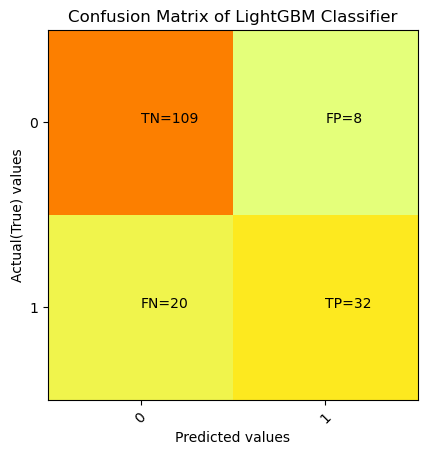

Classification report of LightGBM Classifer: 
               precision    recall  f1-score   support

           0     0.8450    0.9316    0.8862       117
           1     0.8000    0.6154    0.6957        52

    accuracy                         0.8343       169
   macro avg     0.8225    0.7735    0.7909       169
weighted avg     0.8311    0.8343    0.8276       169



In [187]:
#Confusion Matrix for LightGBM classifier
lgbmcm =confusion_matrix(y_test, lgbm_predict)
plt.clf()
plt.imshow(lgbmcm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['0','1']
plt.title('Confusion Matrix of LightGBM Classifier')
plt.ylabel('Actual(True) values')
plt.xlabel('Predicted values')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s=[['TN', 'FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+"="+ str (lgbmcm[i][j]))
plt.show()

#Classification report of LightGBM Classifier
print('Classification report of LightGBM Classifer: \n',classification_report(y_test, lgbm_predict, digits=4))

### 10.11: Cat-Boost Classifier

##### Train score, Test score and Misclassification rate

In [188]:
#Train score and test score of Cat-Boosting Classifier
print("Train accuracy of Cat-Boosting Classifier : ", cb.score(X_train, y_train)*100)
print("Accuracy (Test) score of Cat-Boosting Classifier: ", cb.score(X_test, y_test)*100)
print("Accuracy (Test) score of Cat-Boosting Classifier: ", accuracy_score(y_test, cb_predict)*100)
print("Misclassification rate of Cat-Boosting Classifier: ", 100-(accuracy_score(y_test, cb_predict)*100))

Train accuracy of Cat-Boosting Classifier :  83.16831683168317
Accuracy (Test) score of Cat-Boosting Classifier:  81.06508875739645
Accuracy (Test) score of Cat-Boosting Classifier:  81.06508875739645
Misclassification rate of Cat-Boosting Classifier:  18.934911242603548


##### Confusion Matrix and Classification Report

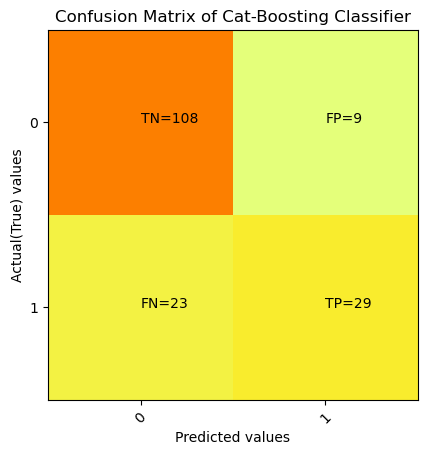

Classification report of Cat-Boosting Classifer: 
               precision    recall  f1-score   support

           0     0.8244    0.9231    0.8710       117
           1     0.7632    0.5577    0.6444        52

    accuracy                         0.8107       169
   macro avg     0.7938    0.7404    0.7577       169
weighted avg     0.8056    0.8107    0.8013       169



In [189]:
#Confusion Matrix for Cat-Boosting classifier
cbcm =confusion_matrix(y_test, cb_predict)
plt.clf()
plt.imshow(cbcm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['0','1']
plt.title('Confusion Matrix of Cat-Boosting Classifier')
plt.ylabel('Actual(True) values')
plt.xlabel('Predicted values')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s=[['TN', 'FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+"="+ str (cbcm[i][j]))
plt.show()

#Classification report of Cat-Boosting Classifier
print('Classification report of Cat-Boosting Classifer: \n',classification_report(y_test, cb_predict, digits=4))

### 10.12: Guassian Process Classifier

##### Train score, Test score and Misclassification rate

In [190]:
#Train score and test score of Gaussian Process Classifier
print("Train accuracy of Gaussian Process Classifier : ", gpc.score(X_train, y_train)*100)
print("Accuracy (Test) score of Gaussian Process Classifier: ", gpc.score(X_test, y_test)*100)
print("Accuracy (Test) score of Gaussian Process Classifier: ", accuracy_score(y_test, gpc_predict)*100)
print("Misclassification rate of Gaussian Process Classifier: ", 100-(accuracy_score(y_test, gpc_predict)*100))

Train accuracy of Gaussian Process Classifier :  77.42574257425743
Accuracy (Test) score of Gaussian Process Classifier:  82.84023668639054
Accuracy (Test) score of Gaussian Process Classifier:  82.84023668639054
Misclassification rate of Gaussian Process Classifier:  17.15976331360946


##### Confusion Matrix and Classification Report

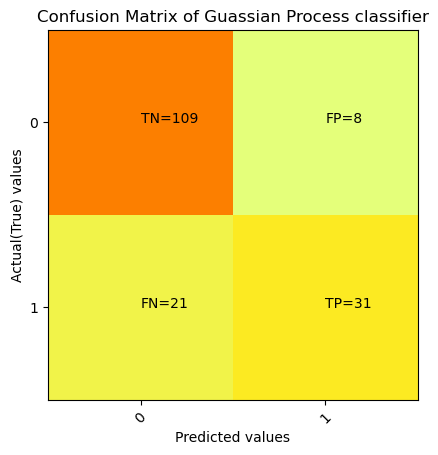

Classification report of Guassian Process classifier: 
               precision    recall  f1-score   support

           0     0.8385    0.9316    0.8826       117
           1     0.7949    0.5962    0.6813        52

    accuracy                         0.8284       169
   macro avg     0.8167    0.7639    0.7820       169
weighted avg     0.8250    0.8284    0.8207       169



In [191]:
#Confusion Matrix for Guassian Process classifier
gpccm =confusion_matrix(y_test, gpc_predict)
plt.clf()
plt.imshow(gpccm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['0','1']
plt.title('Confusion Matrix of Guassian Process classifier')
plt.ylabel('Actual(True) values')
plt.xlabel('Predicted values')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s=[['TN', 'FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+"="+ str (gpccm[i][j]))
plt.show()

#Classification report of Guassian Process classifier
print('Classification report of Guassian Process classifier: \n',classification_report(y_test, gpc_predict, digits=4))

### 10.13: Multilayer Perceptron Classifier

##### Train score, Test score and Misclassification rate

In [192]:
#Train score and test score of Multilayer Perceptron
print("Train accuracy of Multilayer Perceptron : ", mlp.score(X_train, y_train)*100)
print("Accuracy (Test) score of MLP: ", mlp.score(X_test, y_test)*100)
print("Accuracy (Test) score of MLP: ", accuracy_score(y_test, mlp_predict)*100)
print("Misclassification rate of MLP: ", 100-(accuracy_score(y_test, mlp_predict)*100))

Train accuracy of Multilayer Perceptron :  82.77227722772277
Accuracy (Test) score of MLP:  82.24852071005917
Accuracy (Test) score of MLP:  82.24852071005917
Misclassification rate of MLP:  17.751479289940832


##### Confusion Matrix and Classification Report

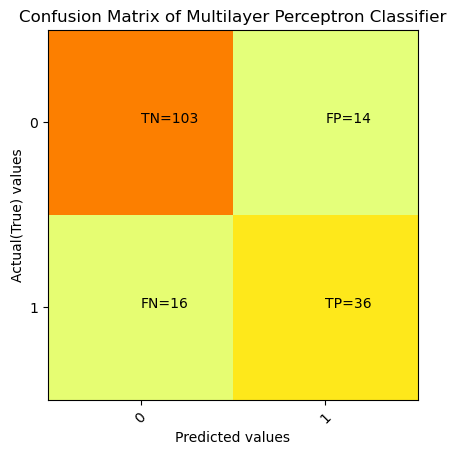

Classification report of MLP Classifer: 
               precision    recall  f1-score   support

           0     0.8655    0.8803    0.8729       117
           1     0.7200    0.6923    0.7059        52

    accuracy                         0.8225       169
   macro avg     0.7928    0.7863    0.7894       169
weighted avg     0.8208    0.8225    0.8215       169



In [193]:
#Confusion Matrix for MLP classifier
mlpcm =confusion_matrix(y_test, mlp_predict)
plt.clf()
plt.imshow(mlpcm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['0','1']
plt.title('Confusion Matrix of Multilayer Perceptron Classifier')
plt.ylabel('Actual(True) values')
plt.xlabel('Predicted values')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s=[['TN', 'FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+"="+ str (mlpcm[i][j]))
plt.show()

#Classification report of MLP Classifier
print('Classification report of MLP Classifer: \n',classification_report(y_test, mlp_predict, digits=4))